# Movie Genres Classfication

Predicting the genre of movie from just 1000 characters of the script.

Dataset Link: https://www.kaggle.com/c/moviegenres/overview

In [50]:
#Importing essential libraries
import pandas as pd
import numpy as np

In [64]:
# Loading the dataset
df=pd.read_csv("D:\Excel sheets\Kaggle-movie-Train.csv")

# Exploring the dataset

In [65]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df.head()

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",thriller
1,2,"t, summa cum laude and all. And I'm about to l...",comedy
2,3,"up Come, I have a surprise.... She takes him ...",drama
3,4,ded by the two detectives. INT. JEFF'S APARTME...,thriller
4,5,"nd dismounts, just as the other children reach...",drama


In [17]:
# Returns number of rows and columns of the dataset
df.shape

(22579, 3)

In [18]:
# Returns an object with all of the column headers
df.columns

Index(['id', 'text', 'genre'], dtype='object')

In [20]:
# Importing essential libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

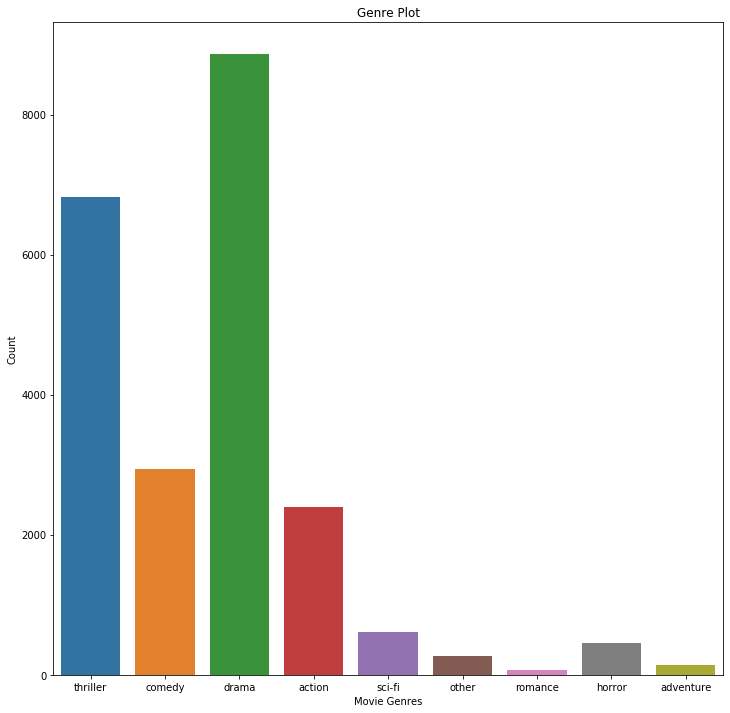

In [21]:
# Visualizing the count of 'genre' column from the dataset
plt.figure(figsize=(12,12))
sns.countplot(x='genre', data=df)
plt.xlabel('Movie Genres')
plt.ylabel('Count')
plt.title('Genre Plot')
plt.show()

# Data Cleaning and Preprocessing

In [22]:
# Finding unique genres
movie_genre = list(df['genre'].unique())
movie_genre.sort()
movie_genre

['action',
 'adventure',
 'comedy',
 'drama',
 'horror',
 'other',
 'romance',
 'sci-fi',
 'thriller']

In [23]:
# Mapping the genres to values
genre_mapper = {'other': 0, 'action': 1, 'adventure': 2, 'comedy':3, 'drama':4, 'horror':5, 'romance':6, 'sci-fi':7, 'thriller': 8}
df['genre'] = df['genre'].map(genre_mapper)
df.head(10)

,id,text,genre
0,0,"eady dead, maybe even wishing he was. INT. 2ND...",8
1,2,"t, summa cum laude and all. And I'm about to l...",3
2,3,"up Come, I have a surprise.... She takes him ...",4
3,4,ded by the two detectives. INT. JEFF'S APARTME...,8
4,5,"nd dismounts, just as the other children reach...",4
5,6,breadth of the bluff. Gabe pulls out his ancie...,8
6,7,uilding. A MAN in pajamas runs out into the ra...,8
7,9,ELLES AND RITA HAYWORTH Just disgustingly rich...,4
8,10,"Memphis goes back into the garage, Budgy cack...",8
9,11,e reels as the world spins. Sweat pours off hi...,1


In [24]:
# Finding any NaN values
df.isnull().any()

id       False
text     False
genre    False
dtype: bool

In [25]:
# Removing the 'id' column
df.drop('id', axis=1, inplace=True)
df.columns

Index(['text', 'genre'], dtype='object')

In [26]:
# Importing essential libraries for performing Natural Language Processing on given dataset
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
df.shape

(22579, 2)

In [28]:
# Cleaning the text
corpus = []
ps = PorterStemmer()

for i in range(0, df.shape[0]):

  # Cleaning special character from the dialog/script
  dialog = re.sub(pattern='[^a-zA-Z]', repl=' ', string=df['text'][i])

  # Converting the entire dialog/script into lower case
  dialog = dialog.lower()

  # Tokenizing the dialog/script by words
  words = dialog.split()

  # Removing the stop words
  dialog_words = [word for word in words if word not in set(stopwords.words('english'))]

  # Stemming the words
  words = [ps.stem(word) for word in dialog_words]

  # Joining the stemmed words
  dialog = ' '.join(words)

  # Creating a corpus
  corpus.append(dialog)

In [29]:
corpus[0:5]

['eadi dead mayb even wish int nd floor hallway three night orderli lead liza door orderli white guy open door step room three white guy mid look wild straight jacket jerri liza reach end rope shake head int decrepit hospit room night ball fetal realli head press cement tri sing jerri blue moon blue moon int nd floor hallway three night liza stand lean rail wall orderli sure go know bad orderli okay liza start hall orderli follow orderli got new patient last week want see liza wave hopeless stop chicken wire window end hall look light break jerri somewher orderli look gotta get back work',
 'summa cum laud launch brand new magazin call expos homag miss juli conroy xenia ohio juli grin juli know find excel editor chief ted yellow page juli let finger walk suddenli music chang peopl ted grin ted play song extend hand dare ask danc juli take hand better ted juli begin danc kiss b g charli jimmi feign tear charli sucker happi end hug jimmi hold start rise nelson hous cloud xenia ted v gues

In [30]:
df[df['genre']==4].index

Int64Index([    2,     4,     7,    10,    11,    12,    13,    14,    15,
               16,
            ...
            22553, 22560, 22561, 22563, 22564, 22567, 22568, 22571, 22574,
            22575],
           dtype='int64', length=8873)

In [31]:

len(corpus)

22579

In [32]:
drama_words = []
for i in list(df[df['genre']==4].index):
  drama_words.append(corpus[i])

action_words = []
for i in list(df[df['genre']==1].index):
  action_words.append(corpus[i])

comedy_words = []
for i in list(df[df['genre']==3].index):
  comedy_words.append(corpus[i])

drama = ''
action = ''
comedy = ''
for i in range(0, 3):
  drama += drama_words[i]
  action += action_words[i]
  comedy += comedy_words[i]

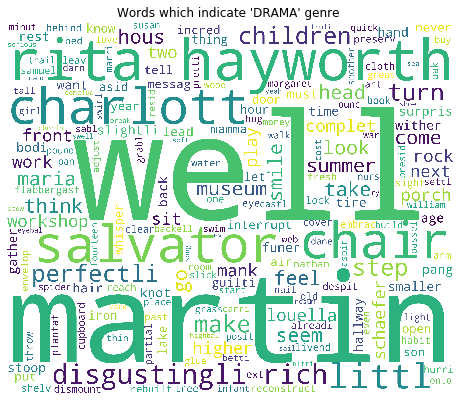

In [36]:
# Creating wordcloud for drama genre
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(drama)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate 'DRAMA' genre ")
plt.show()

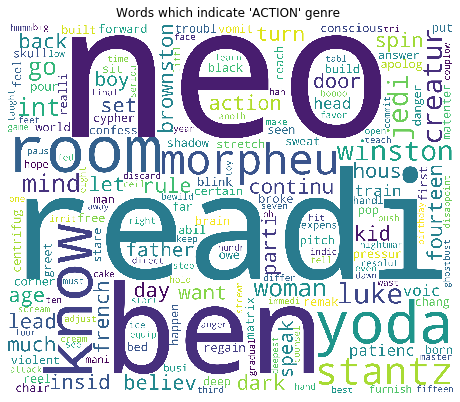

In [37]:
# Creating wordcloud for action genre
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(action)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate 'ACTION' genre ")
plt.show()

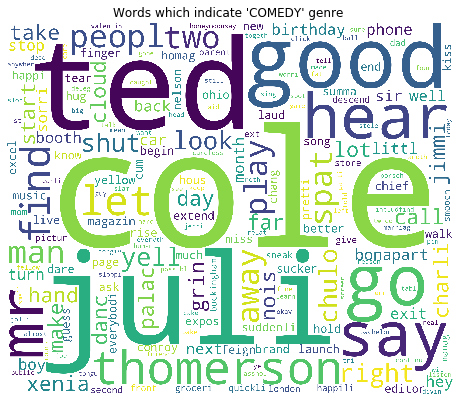

In [38]:
# Creating wordcloud for comedy genre
wordcloud3 = WordCloud(background_color='white', width=3000, height=2500).generate(comedy)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud3)
plt.axis('off')
plt.title("Words which indicate 'COMEDY' genre ")
plt.show()

In [40]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(1,2))
X = cv.fit_transform(corpus).toarray()

In [41]:
y = df['genre'].values

# Model Building 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (18063, 10000), X_test size: (4516, 10000)


# Multinomial Naive Bayes 

In [43]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [44]:
# Predicting the Test set results
nb_y_pred = nb_classifier.predict(X_test)

In [45]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score
score1 = accuracy_score(y_test, nb_y_pred)
print("---- Score ----")
print("Accuracy score is: {}%".format(round(score1*100,2)))

---- Score ----
Accuracy score is: 89.57%


In [46]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)

In [47]:
nb_cm

array([[  62,    1,    0,    0,    1,    2,    0,    0,    0],
       [   0,  450,    0,    8,    6,    1,    0,    0,   11],
       [   0,    2,   41,    0,    1,    0,    0,    0,    1],
       [   0,    7,    0,  517,   18,    2,    0,    4,   11],
       [   3,   42,    1,   38, 1607,   21,    1,   11,  103],
       [   0,    1,    0,    1,    4,   73,    0,    0,    3],
       [   0,    1,    0,    0,    0,    0,   10,    0,    0],
       [   0,    2,    0,    2,    7,    1,    0,  112,    8],
       [   0,   14,    0,   21,   77,   11,    0,   22, 1173]],
      dtype=int64)

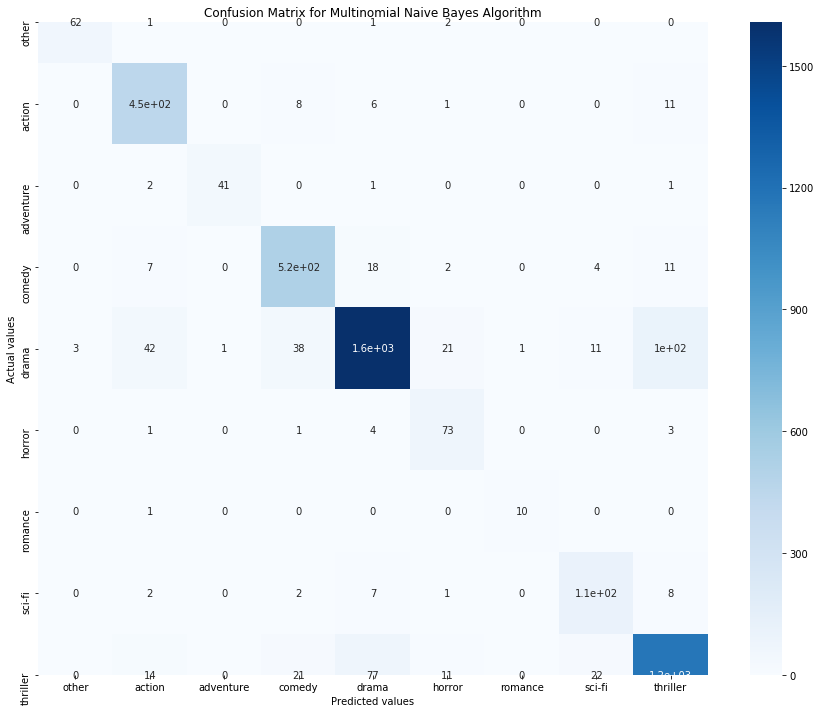

In [48]:
# Plotting the confusion matrix
plt.figure(figsize=(15,12))
axis_labels = ['other', 'action', 'adventure', 'comedy', 'drama', 'horror', 'romance', 'sci-fi', 'thriller']
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=axis_labels, yticklabels=axis_labels)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [51]:
# Hyperparameter tuning the Naive Bayes Classifier
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1,1.1,0.1):
  temp_classifier = MultinomialNB(alpha=i)
  temp_classifier.fit(X_train, y_train)
  temp_y_pred = temp_classifier.predict(X_test)
  score = accuracy_score(y_test, temp_y_pred)
  print("Accuracy score for alpha={} is: {}%".format(round(i,1), round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print('--------------------------------------------')
print('The best accuracy is {}% with alpha value as {}'.format(round(best_accuracy*100, 2), round(alpha_val,1)))

Accuracy score for alpha=0.1 is: 91.34%
Accuracy score for alpha=0.2 is: 91.08%
Accuracy score for alpha=0.3 is: 90.85%
Accuracy score for alpha=0.4 is: 90.59%
Accuracy score for alpha=0.5 is: 90.26%
Accuracy score for alpha=0.6 is: 90.12%
Accuracy score for alpha=0.7 is: 90.04%
Accuracy score for alpha=0.8 is: 89.95%
Accuracy score for alpha=0.9 is: 89.79%
Accuracy score for alpha=1.0 is: 89.57%
--------------------------------------------
The best accuracy is 91.34% with alpha value as 0.1


In [52]:
classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.1, class_prior=None, fit_prior=True)

# Predictions

In [53]:
def genre_prediction(sample_script):
  sample_script = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_script)
  sample_script = sample_script.lower()
  sample_script_words = sample_script.split()
  sample_script_words = [word for word in sample_script_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_script = [ps.stem(word) for word in sample_script_words]
  final_script = ' '.join(final_script)

  temp = cv.transform([final_script]).toarray()
  return classifier.predict(temp)[0]

In [54]:
# For generating random integer
from random import randint

In [56]:
# Loading test dataset
test = pd.read_csv("D:\Excel sheets\Kaggle-Movie-Test.csv")
test.columns

Index(['id', 'text'], dtype='object')

In [57]:
test.shape

(5589, 2)

In [58]:
test.drop('id', axis=1, inplace=True)
test.head(10)

,text
0,glances at her. BOOK Maybe I ought to learn t...
1,hout breaking stride. Tatiana sees her and can...
2,dead bodies. GEORDI Mitchell... DePaul... LANG...
3,take myself. BRANDON How bad is the other thi...
4,"her body to shield his own. KAY Freeze it, Bug..."
5,im from ear to ear. Ya want me to make a state...
6,"BEN We need to help Reed Sue shakes her head,..."
7,slowly. At the entrance to the alley stands a ...
8,edge of the field. Neil steps closer. THE TOMB...
9,"special, take ya in the kitchen and suck your ..."


In [59]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: pause, an officer appears stealthily, with drawn revolver, around the hall door of the room. OFFICER Nobody here, Chief. FIRST DETECTIVE peering through door Well, take it easy. Let's get some light on here. Officer flashes flashlight in search of switch. FIRST DETECTIVE calls into hallway A couple of you fellows get upstairs! VOICES Off scene Yes, sir. We hear them ascending the stairs. Officer crosses and gingerly opens door of room that the Monster disappeared through, flashes light about and enters. 133 INT. ROOM ADJOINING WORTH'S OFFICE There is only the one entrance door, and the window of the room, when the officer examines it with flashlight, appears to be flat against the brick wall of the adjoining house. The room is empty. 134 INT. WORTH'S OFFICE The detective, evidently finding switch, has thrown on lights. He is talking to Florence and Winton. DETECTIVE Can you give me a description of the person you saw? FLORENCE Not a very good one, I guess. He wasn't like anythi

In [60]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ter in the window. Eldridge's got his ear glued to a PHONE. ELDRIDGE to the others The pigs are going for Murder one... TYRONE Right with Bobby getting out, they try to put Huey in the gas chamber... Damn. LITTLE BOBBY Please Huey stay alive INT. ALAMEDA COUNTY JAIL DAY In a MOS sequence, JACKSON a Black Trustee leads Bobby Seale dressed in STREET CLOTHES down the windy halls. Bobby holds a FILE of RELEASE PAPERS. Seale comes to the doorway of the INFIRMARY. HUEY lies there, beaten and bloody. The two men LOCK EYES, each raising a FIST in salute. INT. AUDITORIUM FREE HUEY MEETING NIGHT Bobby enters. The auditorium is empty except for Cleaver, Tyrone, and Little Bobby. BOBBY SEALE shocked Where's everybody? TYRONE We had over a hundred people, just on the Free Huey Defense Committee alone until we chose a lawyer. CHARLES GARRY, a white man in a crumpled suit move across the gym floor towards them. BOBBY SEALE Can he free Huey? ELDRIDGE If anybody can, he's the man. Bobby Seale S

In [61]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ou're the dead. ADAM Aren't you dead? BETELGEUSE Hell no! I'm rolling. I'm a businessman. I'm the man what am . Beeet el Jooose ! Who do I gotta kill? ADAM You don't kill anyone. BARBARA Just get some people out of our house. BETELGEUSE Bio busting . I love it. Who do I gotta kill? Family right? Obnoxious, I bet. contorting face Mommie, daddy, piglets. BARBARA Just one daughter. BETELGEUSE Hey you've been on Saturn! brushing yellow dust off her I hate those Sandworms! Yecchhh ! I've lost a lot of buddies to Sandworms. back to work So a daughter? She got good legs? God I love a young leg. Air blows up Barbara's dress, exposing her legs. He leers. BARBARA She's only fourteen... ADAM ... acts like she's thirty five. BETELGEUSE rubbing hands How does she feel about short old men with dirty ears? Barbara is grossed out and increasingly uneasy. Beetle Juice senses it and gets back to business. BETELGEUSE So you, the dead , want me, the undead , to throw the live guys Mommie, Daddy an

In [62]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: essingly. Suddenly, a sound from downstairs. The front door is opened. LARRY from below Sweetheart? JULIA withdraws from his touch. LARRY from below Where are you? INT. HALLWAY DAY Shot from the stairs of LARRY. He looks up the flight. He takes a step towards the stairs. INT. TORTURE ROOM DAY JULIA takes a step backwards, her foot hitting PRUDHOE's corpse. INT. HALLWAY DAY LARRY is still at the bottom of the stairs. LARRY Are you there? For a moment it looks as though he's going to climb the stairs, then he thinks better of it, and goes through to the back of the house. INT. TORTURE ROOM DAY JULIA has wrapped the corpse of PRUDHOE up in its clothes and is now lifting it. The body is lighter now, having been drained of nourishment. Its head lolls back and its dentures drop out, hitting the floor loudly. She freezes. No sound from below. She backs out of the room with her burden. FRANK's arm reaches for the fallen dentures and peers at them. FRANK Who's a pretty boy then? Soft la

In [63]:
# Predicting values
row = randint(0,test.shape[0]-1)
sample_script = test.text[row]

print('Script: {}'.format(sample_script))
value = genre_prediction(sample_script)
print('Prediction: {}'.format(list(genre_mapper.keys())[value]))

Script: ENDER LEFT. Jack fakes left, right takes the tackle but manages to roll out of it! HE COULD GO ALL THE... ON THE CROWD They're going wild! ON THE A SQUAD running along the sideline Diane leading the way! ON JACK he looks right sees Diane and mouths I love you! JACK'S POV Diane mouths I love you! DIANE'S POV Jack makes the touchdown, spikes the ball, and starts a slow run toward us arms outstretched. WE run toward him in SLOW MOTION. SUDDENLY a WALL OF PLAYERS enter frame and tackles him in celebration. END MUSIC. LISA V.O. Now, right about here's where the real shit started to hit the fan... Don't worry I'll clean this up a bit if I have to appear in court especially if we're on Court TV. INT. DIANE'S SPLIT LEVEL FRONT DOOR NIGHT SFX DOORBELL DENNIS WESTON Diane's Dad opens the door while DEEDEE Diane's Mom FLASHES a PHOTO of a surprised Jack and his parents. DEEDEE Well, there's a Christmas card. DENNIS Come in, come in... All enter the FOYER. Jack looks gorgeous in his tux. H